In [9]:
!pip install pandas matplotlib

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF


In [11]:
# Load dataframes
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")
customers_df = pd.read_csv("Customers.csv")

# Check the data
print(products_df.head())
print(transactions_df.head())
print(customers_df.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawre

In [12]:
# Convert date columns to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Merge datasets
merged_df = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         

In [13]:
# 1. sales by category
sales_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# 2. regional performance
sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 3. customer Loyalty
repeat_purchases = merged_df.groupby('CustomerID')['TransactionID'].count().value_counts()

# 4. Average order value by region
avg_order_value_region = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# 5. top-performing Products
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# display insights
print("Sales by Category:", sales_by_category)
print("\nRegional Performance:", sales_by_region)
print("\nCustomer Loyalty:", repeat_purchases)
print("\nAverage Order Value by Region:", avg_order_value_region)
print("\nTop-Performing Products:", top_products)


Sales by Category: Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Regional Performance: Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Customer Loyalty: TransactionID
5     42
4     31
3     31
6     25
8     20
7     18
1     12
2      9
9      5
10     4
11     2
Name: count, dtype: int64

Average Order Value by Region: Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64

Top-Performing Products: ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


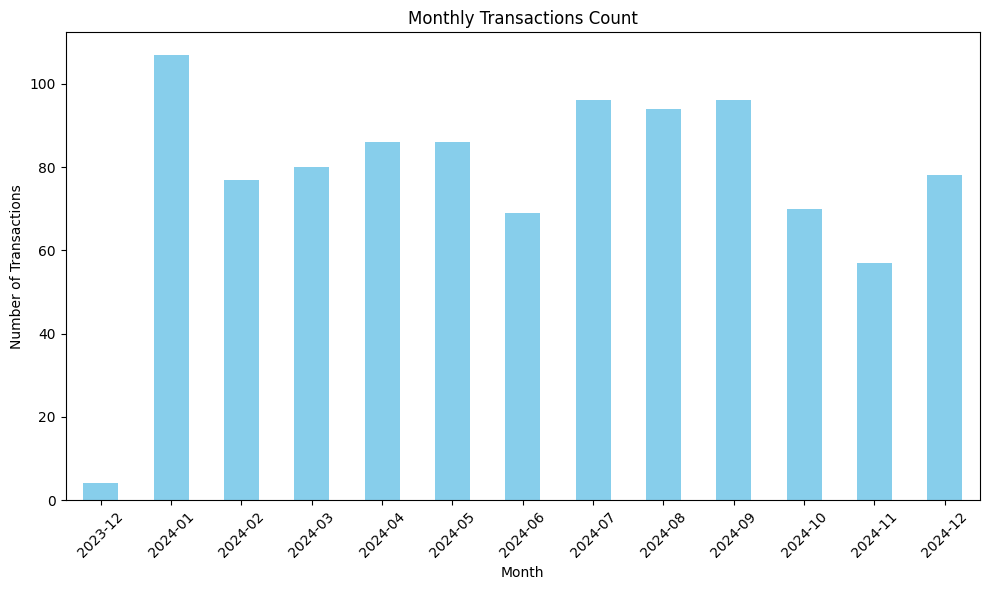

In [16]:
# visualization: transactions over Time
transactions_over_time = merged_df['TransactionDate'].dt.to_period('M').value_counts().sort_index()

# Plotting and save
plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind='bar', color='skyblue')
plt.title('Monthly Transactions Count')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('transactions_over_time.png')
plt.show()
